# **[Part 4] Comparing Regressors**



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
df = pd.read_csv('NMDA_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(95, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(95, 121)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:07<00:00,  5.67it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 90
[LightGBM] [Info] Start training from score 6.074944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 42/42 [00:05<00:00,  7.30it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 90
[LightGBM] [Info] Start training from score 6.074944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,18284221410254165441232009943892380116131444196...,-1121432246495588894011579324602309289984647692...,587445831811194880559989915648.00,0.11
KernelRidge,21.06,-11.30,6.15,0.03
DummyRegressor,2.63,0.00,1.75,0.03
PassiveAggressiveRegressor,2.58,0.03,1.73,0.02
Lasso,2.39,0.15,1.62,0.01
LassoLars,2.39,0.15,1.62,0.01
ElasticNet,1.99,0.39,1.37,0.04
SVR,1.87,0.47,1.28,0.02
OrthogonalMatchingPursuitCV,1.86,0.47,1.28,0.03


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,13872344172589489989954636237486248790689455060...,-7938063609870652716955850476102567053975222363...,49435980632433082160849220179534544896.00,0.05
KernelRidge,3.53,-13.47,6.67,0.01
GaussianProcessRegressor,2.13,-5.46,4.46,0.02
LinearSVR,1.25,-0.42,2.09,0.08
HuberRegressor,1.23,-0.29,1.99,0.04
TransformedTargetRegressor,1.22,-0.23,1.95,0.02
LinearRegression,1.22,-0.23,1.95,0.03
PassiveAggressiveRegressor,1.21,-0.19,1.91,0.02
BaggingRegressor,1.21,-0.17,1.90,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

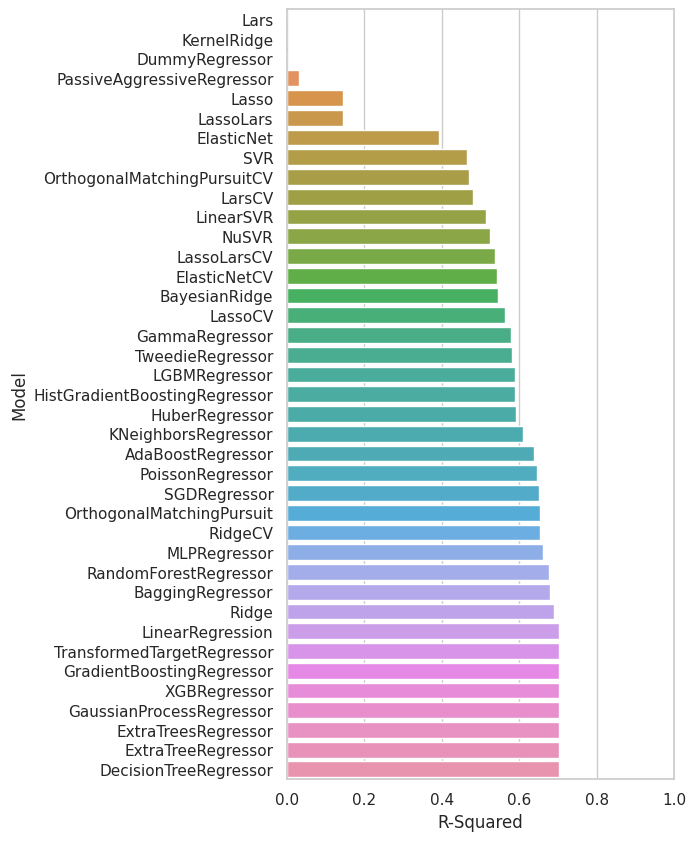

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

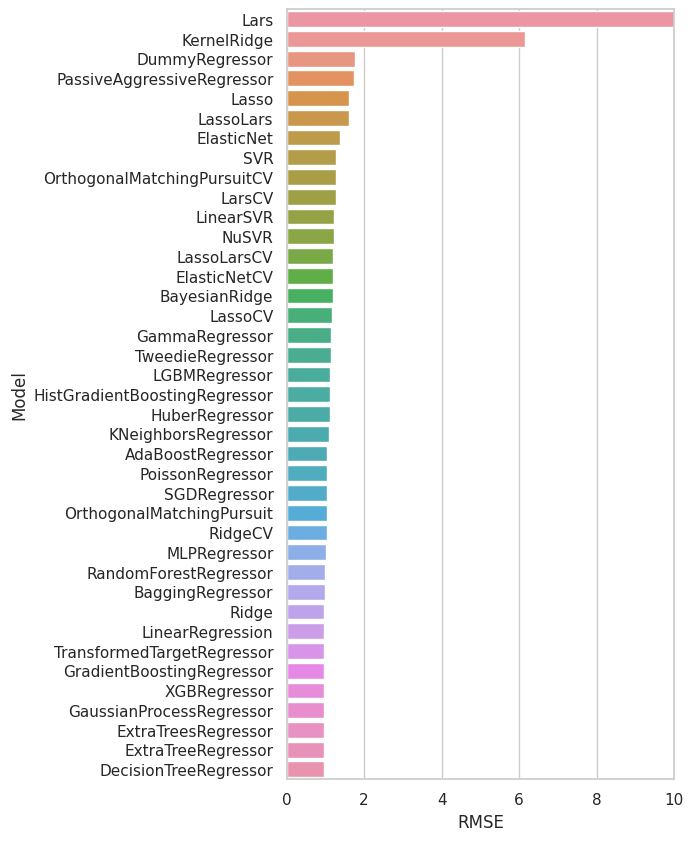

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

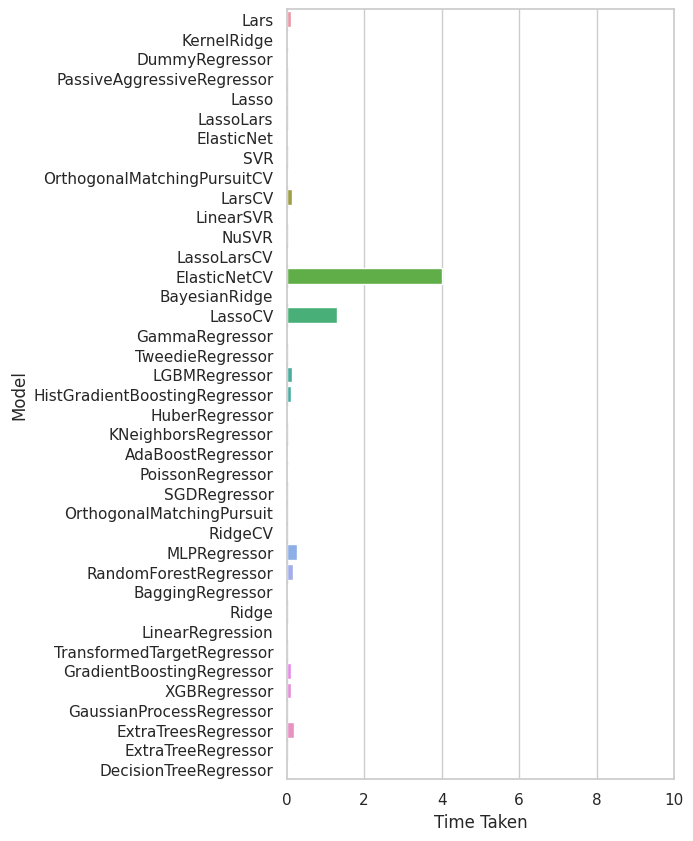

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))